In [1]:
import numpy as np

# Numpy Arrays

In [2]:
squares = np.empty(5)
for n in range(5):
    squares[n] = n**2

In [3]:
squares1 = [n**2 for n in range(5)]

print (squares, squares1)
print (type(squares), type(squares1))

[  0.   1.   4.   9.  16.] [0, 1, 4, 9, 16]
<class 'numpy.ndarray'> <class 'list'>


In [4]:
squares1 = np.asarray(squares1)

print (type(squares1))

<class 'numpy.ndarray'>


$$ \large \sin(x) $$

In [5]:
x = np.linspace(0, 3*np.pi,1000)
z1 = np.sin(x)

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

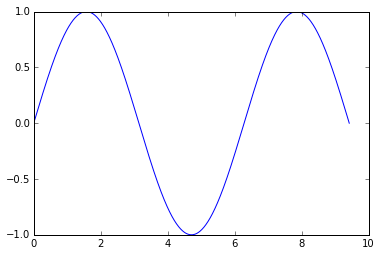

In [7]:
plt.figure()
plt.plot(x,z1)

In [8]:
y = np.arange(-np.pi/2, 2*np.pi, 0.01)
z2 = np.cos(y)

In [9]:
z = z1*z2

ValueError: operands could not be broadcast together with shapes (1000,) (786,) 

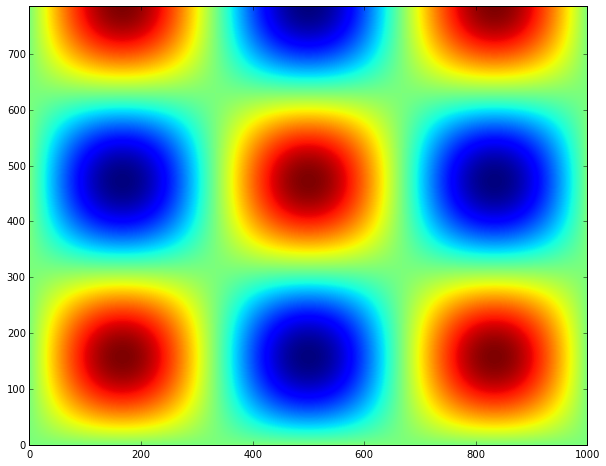

In [10]:
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy)

plt.figure(figsize=(10,10))
plt.imshow(z, origin='bottom')

(0.0, 9.4247779607693793, -1.5707963267948966, 6.2792036732051102)

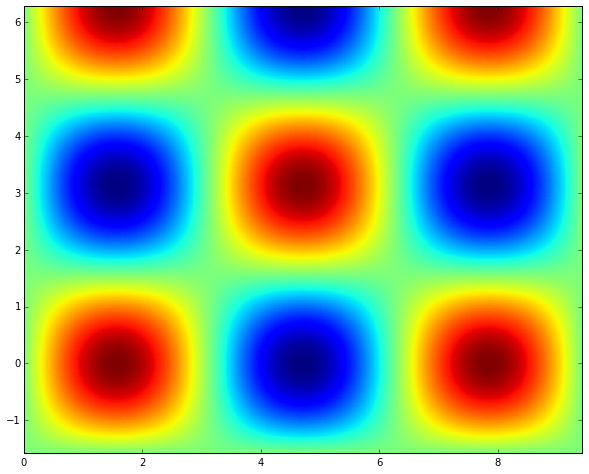

In [11]:
z = np.sin(x) * np.cos(y[:, np.newaxis])

plt.figure(figsize=(10,8))
plt.pcolormesh(x,y,z)
plt.axis('tight')

(0.0, 9.4247779607693793, -1.5707963267948966, 6.2792036732051102)

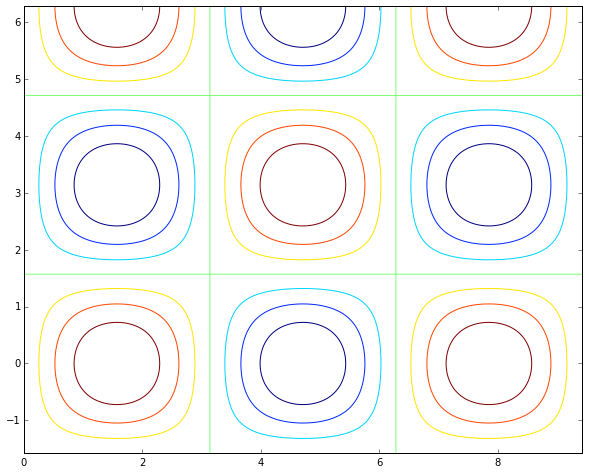

In [12]:
plt.figure(figsize=(10,8))
plt.contour(x,y,z)
plt.axis('tight')

In [19]:
mask = z > 0.9
Z = np.ma.masked_array(z, mask)
print (Z[-1])

[0.0 0.009433997444892279 0.018867155229113926 0.028298633766727217
 0.03772759362125359 0.047153195580386574 0.056574600730684835
 0.06599097053223855 0.07540146689330256 0.08480525224488959
 0.09420148961531712 0.10358934270470077 0.11296797595938832
 0.1223365546463268 0.13169424492735704 0.14104021393342833
 0.15037362983872665 0.15969366193471052 0.1689994807040469
 0.17829025789444145 0.18756516659235598 0.19682338129660681
 0.20606407799183757 0.2152864342218593 0.22448962916285245
 0.233672843696423 0.24283526048250711 0.25197606403211736
 0.2610944407799245 0.27018957915666736 0.27926066966138596
 0.2883069049334697 0.2973274798245158 0.3063215914699903
 0.3152884393606858 0.3242272254139701 0.33313715404481836
 0.34201743223662295 0.3508672696117751 0.35968587850201134
 0.36847247401851874 0.3772262741217932 0.3859464996912437
 0.39463237459453687 0.40328312575667574 0.4118979832288061
 0.42047618025674516 0.4290169533492251 0.4375195423458469
 0.44598319048473717 0.454407144

(0.0, 9.4247779607693793, -1.5707963267948966, 6.2792036732051102)

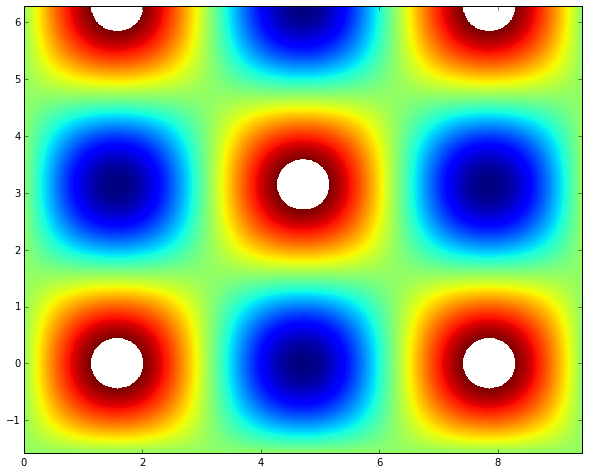

In [18]:
plt.figure(figsize=(10,8))
plt.pcolormesh(x,y,np.ma.masked_invalid(Z))
plt.axis('tight')

# Let's try to read in real data

## Using netCDF4

In [2]:
import netCDF4

In [3]:
uri = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version4/anom/.sst/T/(days%20since%201960-01-01)/streamgridunitconvert/dods'
nc = netCDF4.Dataset(uri)

In [4]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    Conventions: IRIDL
    dimensions(sizes): T(1940), X(180), Y(89), zlev(1)
    variables(dimensions): float32 zlev(zlev), float32 X(X), float32 Y(Y), float32 T(T), int16 sst(T,zlev,Y,X)
    groups: 

In [5]:
SST = nc.variables['sst'][:,0]
Lat = nc.variables['Y'][:]
Lon = nc.variables['X'][:]

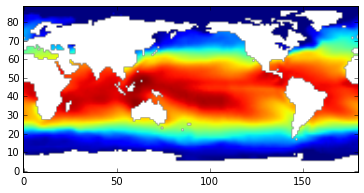

In [8]:
plt.figure()
plt.imshow(SST[0], origin='bottom')

In [9]:
SST_mid = SST[0,10:-10]
Lat_mid = Lat[10:-10]

In [10]:
print(SST_mid.shape, Lat_mid.shape, Lon.shape)

(69, 180) (69,) (180,)


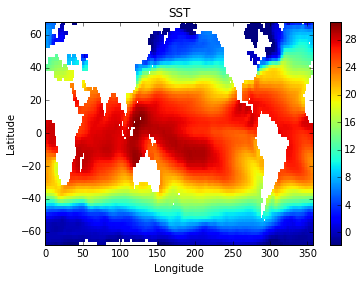

In [55]:
plt.figure()
plt.pcolormesh(Lon, Lat_mid, SST_mid)
plt.axis('tight')
plt.title('SST')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

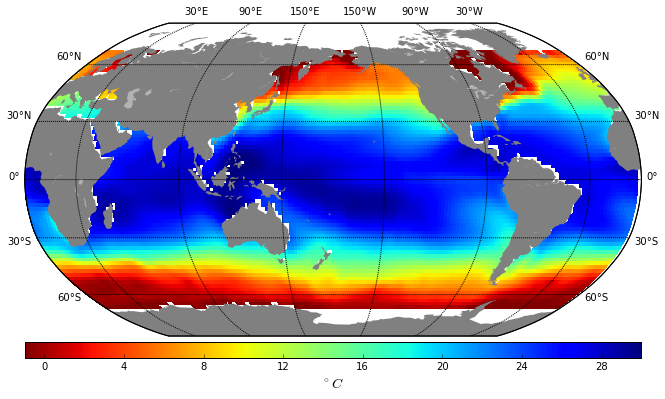

In [22]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='robin', lon_0=180)

fig = plt.figure(figsize=(16,6))

axi = fig.add_subplot(111)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
xx, yy = np.meshgrid(Lon, Lat_mid)
x,y = m(xx, yy)
pc = m.pcolormesh(x, y, SST_mid, cmap='jet_r')
pc.set_clim([-1.,30.])
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
cbar.set_label('$^\circ C$', fontsize=14)

## Using xray

In [3]:
import xray

In [4]:
# ds = xray.open_dataset("http://podaac-opendap.jpl.nasa.gov:80/opendap/allData/ghrsst/data/L4/GLOB/NAVO/K10_SST/2015/032/20150201-NAVO-L4HR1m-GLOB-v01-fv01_0-K10_SST.nc.bz2")
uri = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version4/anom/.sst/T/(days%20since%201960-01-01)/streamgridunitconvert/dods'
ds = xray.open_dataset(uri)

In [5]:
ds

<xray.Dataset>
Dimensions:  (T: 1940, X: 180, Y: 89, zlev: 1)
Coordinates:
  * zlev     (zlev) float32 0.0
  * X        (X) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * Y        (Y) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * T        (T) datetime64[ns] 1854-01-16T12:00:00 1854-02-15 ...
Data variables:
    sst      (T, zlev, Y, X) float64 ...
Attributes:
    Conventions: IRIDL

In [9]:
sst = ds["sst"]
Lat = ds["X"]
Lon = ds["Y"]
# Mask = ds["mask"][0]
#sstdom = sst.sel(lat=slice(-60,60))
print(sst, Lat, Lon)
#print sst.shape

<xray.DataArray 'sst' (T: 1940, zlev: 1, Y: 89, X: 180)>
[31078800 values with dtype=float64]
Coordinates:
  * zlev     (zlev) float32 0.0
  * X        (X) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * T        (T) datetime64[ns] 1854-01-16T12:00:00 1854-02-15 ...
  * Y        (Y) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
Attributes:
    pointwidth: 1.0
    long_name: Extended reconstructed sea surface temperature
    valid_max: 4500
    units: Celsius_scale
    valid_min: -300
    expires: 1443744000
    iridl:hasSemantics: iridl:SeaSurfaceTemperature
    standard_name: sea_surface_temperature <xray.DataArray 'X' (X: 180)>
array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
         18.,   20.,   22.,   24.,   26.,   28.,   30.,   32.,   34.,
         36.,   38.,   40.,   42.,   44.,   46.,   48.,   50.,   52.,
         54.,   56.,   58.,   60.,   62.,   64.,   66.,   68.,   70.,
         72.,   74.,   76.,   78.,   80.,   82.,  

In [14]:
print(sst.shape)

(1, 89, 180)


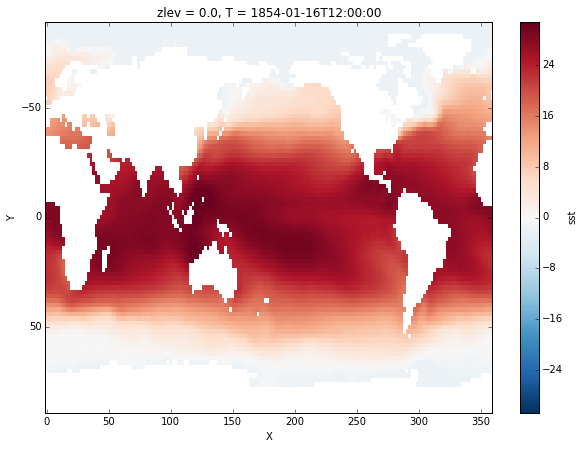

In [42]:
plt.figure(figsize=(10,7))
xray.plot.imshow(sst[0,0], origin='bottom')

# plt.figure()
# plt.pcolormesh(Lat, Lon, np.ma.masked_array(SST[0], mask[0]!=1))

In [6]:
sst_mid = ds.sst.sel(T='1950-01',Y=slice(-60,60)) 
#lon_GF = ds.X.sel(X=slice(20,40))
lat_mid = ds.Y.sel(Y=slice(-60,60))

In [33]:
print (sst_mid.shape)

(1, 1, 61, 180)


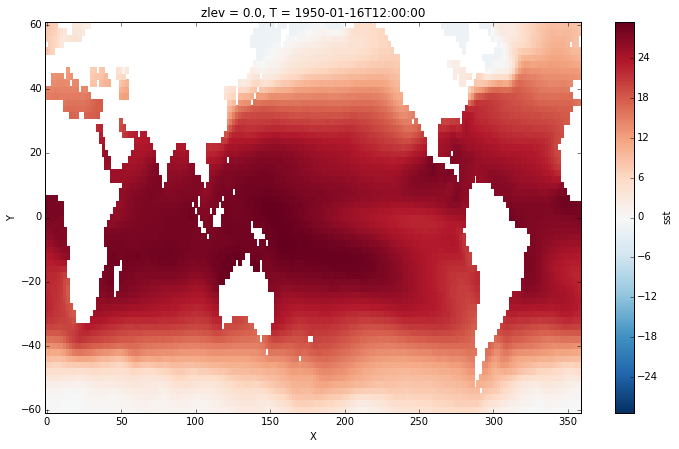

In [39]:
plt.figure(figsize=(12,7))
xray.plot.pcolormesh(sst_mid[0,0])

## Using Bokeh


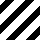
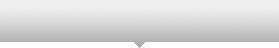
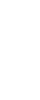
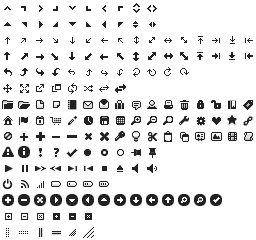
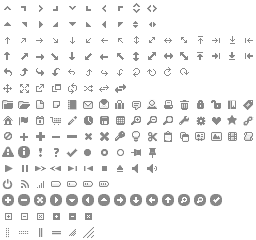
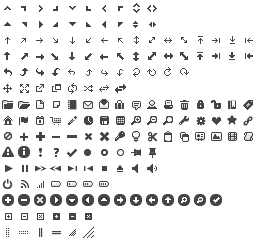
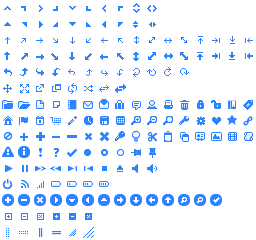
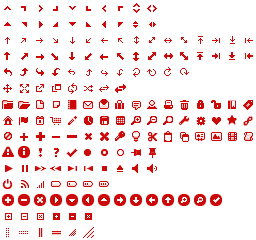
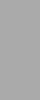
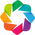
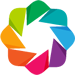
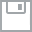
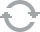
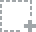
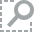
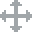
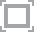
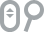

In [6]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

In [8]:
# from bokeh.plotting import output_file

x = Lon[:]
y = Lat[:]

# output_file('yearly_averaged_SST.html')

p = figure(x_range=[0., 360.], y_range=[-90., 90.], plot_width=700, plot_height=400)
p.image(image=[np.ma.masked_invalid(SST[0])], x=[0.], y=[-90.], dw=[360.], dh=[180.], palette="Spectral11")
#p.colorbar()

show(p)